# Tuning of hyperparameters
#### Script to train the model multiple times using different values for batch size and learning rate. The training is done using a small subset of the total training dataset and the results are validated against a different subset.

In [0]:
import os
from IPython.core.debugger import set_trace
from models.EDCNN import EDCNN
from utils import utils
import torch
import torch.nn as nn
import torch.utils.data.sampler as sampler
from torch.autograd import Variable
from matplotlib import pyplot as plt
import random
from numpy import log10

In [0]:
#csv file containing the directories of the lo res and ground truth patches
csv_file = r'C:\Users\Juan Pisula\Desktop\ct_images\para probar el procesamiento de los volumenes\100_FBPPhil_500FBP.csv'
dataset = utils.CTVolumesDataset(csv_file)

#split of data in training, validation and testing data:
#the .csv is shuffled (using the same seed everytime for repeatability)
random.seed(10)
random.shuffle(total_idx)

#pick 15% of samples to test
testing_samples_percentage = 0.15
num_samples = len(dataset)
split_index = int( num_samples * training_samples_percentage )
total_idx = list(range(num_samples))
#pick the first 15% of samples in the shuffled dataset for testing
testing_idx = total_idx[0 : split_index]
#pick the other 85% of samples in the shuffled dataset for training
training_idx = total_idx[split_index : num_samples]
#pick the first 15% of samples used for training. These are the samples that are going to be used for training in this script
training_subset_idx = training_idx[0:split_idx]
#pick the second 15% of samples used for validation
validation_subset_idx = training_idx[split_idx: 2 * split_idx]

training_subset_sampler = sampler.SubsetRandomSampler(training_subset_idx)
validation_sampler = sampler.SubsetRandomSampler(validation_idx)

In [0]:
model = EDCNN()
model.double()
if torch.cuda.is_available():
    model.cuda()

REDCNN(
  (enc_1): Sequential(
    (0): Conv3d(1, 32, kernel_size=(3, 5, 5), stride=(1, 1, 1))
    (1): ReLU()
  )
  (enc_2): Sequential(
    (0): Conv3d(32, 32, kernel_size=(3, 5, 5), stride=(1, 1, 1))
    (1): ReLU()
  )
  (enc_3): Sequential(
    (0): Conv3d(32, 32, kernel_size=(3, 5, 5), stride=(1, 1, 1))
    (1): ReLU()
  )
  (enc_4): Sequential(
    (0): Conv3d(32, 32, kernel_size=(3, 5, 5), stride=(1, 1, 1))
    (1): ReLU()
  )
  (dec_1_deconv): ConvTranspose3d(32, 32, kernel_size=(3, 5, 5), stride=(1, 1, 1))
  (dec_1_ReLU): ReLU()
  (dec_2_deconv): ConvTranspose3d(32, 32, kernel_size=(3, 5, 5), stride=(1, 1, 1))
  (dec_2_ReLU): ReLU()
  (dec_3_deconv): ConvTranspose3d(32, 32, kernel_size=(3, 5, 5), stride=(1, 1, 1))
  (dec_3_ReLU): ReLU()
  (dec_4_deconv): ConvTranspose3d(32, 1, kernel_size=(3, 5, 5), stride=(1, 1, 1))
)

In [0]:
bs_list = [1, 2, 4, 8, 16, 32]
lr_list = [0.01, 0.001, 0.0001, 0.00001]
bs_np, lr_np = np.array(bs_list), np.array(lr_list)
bs_mat, lr_mat = np.meshgrid(bs_np, lr_np)
bs_np = np.resize(bs_mat, -1)
lr_np = np.resize(lr_mat, -1)

num_epochs = 100

for i in len(lr_np):
  lr = lr_np[i]
  bs = bs_np[i]

  #dataloader
  training_subset_dataloader = torch.utils.data.DataLoader(dataset=dataset, batch_size = bs, sampler = training_subset_sampler)
  validation_dataloader = torch.utils.data.DataLoader(dataset=dataset, batch_size = bs, sampler = validation_sampler)
  

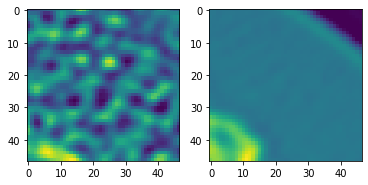

In [0]:
vol_idx = 0
slc = 10
pair = dataset[vol_idx]
lo_res = pair[0]
target = pair[1]

fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(lo_res[slc][:][:])
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(target[slc][:][:])

In [0]:
lo_res_ = torch.from_numpy(lo_res)
lo_res_ = lo_res_.unsqueeze(0)
lo_res_ = lo_res_.unsqueeze(1)
lo_res_ = utils.var_or_cuda( lo_res_ )
net_output = model(lo_res_)     

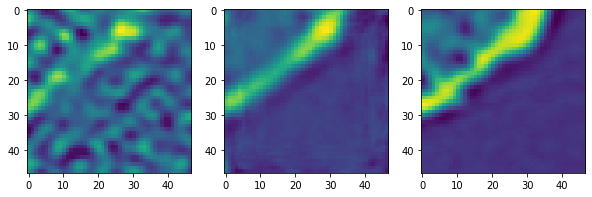

In [0]:
fig = plt.figure(figsize=(10, 10))
a = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(lo_res[slc][:][:])
a = fig.add_subplot(1, 3, 2)
net_output_cpu = net_output.detach()
net_output_cpu = net_output_cpu.cpu()
imgplot = plt.imshow(net_output_cpu[0][0][slc][:][:])
a = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(target[slc][:][:])